In [10]:
import numpy as np
import scipy as sp
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

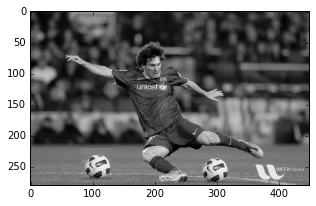

In [12]:
img = cv2.imread('messi.jpg', 0) # Load in grayscale

plt.figure(figsize=(5,5))
plt.imshow(img, 'gray')

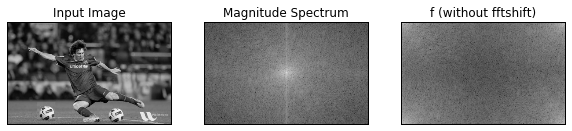

In [13]:
f = np.fft.fft2(img) # Compute DCT
fshift = np.fft.fftshift(f) # FFSHIFT
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.figure(figsize=(10,10))

plt.subplot(131)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(20 * np.log(np.abs(f)), cmap = 'gray')
plt.title('f (without fftshift)')
plt.xticks([]), plt.yticks([])
plt.show()

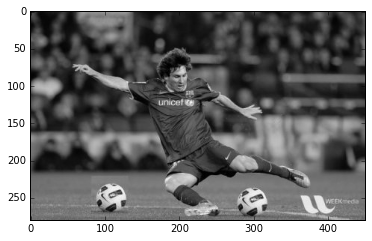

In [14]:
img_back1 = np.fft.ifft2(f)
plt.imshow(np.abs(img_back1), cmap='gray')

/Users/faisal/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log


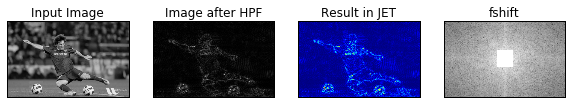

In [15]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(10,10))

plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(20 * np.log(np.abs(fshift)), cmap='gray')
plt.title('fshift'), plt.xticks([]), plt.yticks([])

plt.show()

# fftshift

In [6]:
freqs = np.fft.fftfreq(10, 0.1)
freqs

array([ 0.,  1.,  2.,  3.,  4., -5., -4., -3., -2., -1.])

In [7]:
np.fft.fftshift(freqs)

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

In [8]:
freqs = np.fft.fftfreq(9, d=1./9).reshape(3, 3)
freqs

array([[ 0.,  1.,  2.],
       [ 3.,  4., -4.],
       [-3., -2., -1.]])

In [9]:
np.fft.fftshift(freqs)

array([[-1., -3., -2.],
       [ 2.,  0.,  1.],
       [-4.,  3.,  4.]])

In [10]:
np.fft.fftshift(freqs, axes=(1,))

array([[ 2.,  0.,  1.],
       [-4.,  3.,  4.],
       [-1., -3., -2.]])

**Convolve an image with itself**

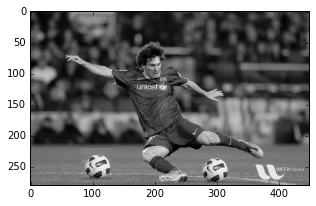

In [3]:
img = cv2.imread('messi.jpg', 0) # Load in grayscale

plt.figure(figsize=(5,5))
plt.imshow(img, 'gray')

In [12]:
from scipy import signal

img_convolve_img = sp.signal.convolve2d(img, img, mode='same')

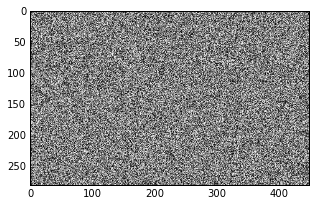

In [13]:
plt.figure(figsize=(5,5))
plt.imshow(img_convolve_img, 'gray')